Quelle: https://anderfernandez.com/en/blog/how-to-code-neural-network-from-scratch-in-python/


oder https://towardsai.net/p/machine-learning/nothing-but-numpy-understanding-creating-neural-networks-with-computational-graphs-from-scratch-6299901091b0


In [1]:
from scipy import stats

class capa():
  def __init__(self, n_neuronas_capa_anterior, n_neuronas, funcion_act):
    self.funcion_act = funcion_act
    self.b  = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size= n_neuronas).reshape(1,n_neuronas),3)
    self.W  = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size= n_neuronas * n_neuronas_capa_anterior).reshape(n_neuronas_capa_anterior,n_neuronas),3)

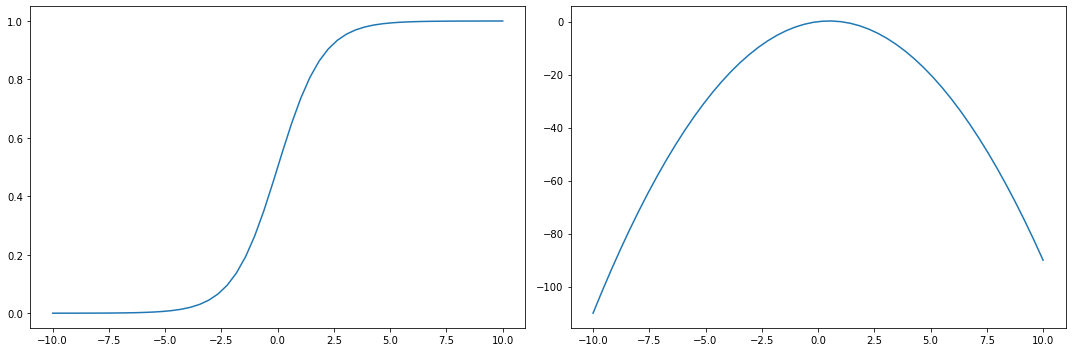

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
sigmoid = (
  lambda x:1 / (1 + np.exp(-x)),
  lambda x:x * (1 - x)
  )

rango = np.linspace(-10,10).reshape([50,1])
datos_sigmoide = sigmoid[0](rango)
datos_sigmoide_derivada = sigmoid[1](rango)

#We create the plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(15,5))
axes[0].plot(rango, datos_sigmoide)
axes[1].plot(rango, datos_sigmoide_derivada)
fig.tight_layout()

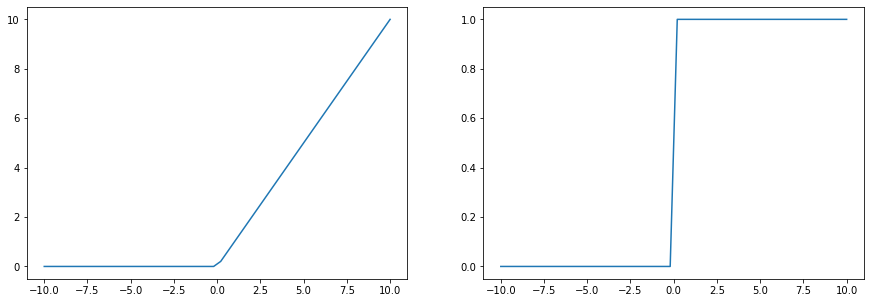

In [5]:
def derivada_relu(x):
  x[x<=0] = 0
  x[x>0] = 1
  return x

relu = (
  lambda x: x * (x > 0),
  lambda x:derivada_relu(x)
  )

datos_relu = relu[0](rango)
datos_relu_derivada = relu[1](rango)


# We set the range
rango = np.linspace(-10,10).reshape([50,1])

# We create the graphs
#plt.cla()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(15,5))
axes[0].plot(rango, datos_relu[:,0])
axes[1].plot(rango, datos_relu_derivada[:,0])
plt.show()


In [7]:
# Number of neurons in each layer 
# The first value is equal to the number of predictors.
neuronas = [2,4,8,1] 

# Activation functions to use in each layer. 
funciones_activacion = [relu,relu, sigmoid]
red_neuronal = []

for paso in range(len(neuronas)-1):
  x = capa(neuronas[paso],neuronas[paso+1],funciones_activacion[paso])
  red_neuronal.append(x)

print(red_neuronal)

[<__main__.capa object at 0x00000202DDE39B80>, <__main__.capa object at 0x00000202DDE39250>, <__main__.capa object at 0x00000202DDE39C10>]


In [11]:
X =  np.round(np.random.randn(20,2),3) # Example of an input vector
z = np.dot(X, red_neuronal[0].W)
print(z[:10,:], X.shape, z.shape)
z = z + red_neuronal[0].b
print(z[:5,:])

[[ 0.131018 -0.44581   0.821638  0.342012]
 [-0.315323  0.432351 -1.837456 -1.233649]
 [ 0.072528 -0.235008  0.452262  0.196878]
 [-0.237186  0.653914 -1.453968 -0.717302]
 [ 0.060118  0.131266  0.30362   0.37215 ]
 [ 0.213938 -0.561834  1.30534   0.66493 ]
 [-0.299754  0.637042 -1.79613  -1.02788 ]
 [-0.094006 -0.120002 -0.4934   -0.52729 ]
 [-0.118659  0.088679 -0.675276 -0.511669]
 [ 0.046043 -0.131263  0.283192  0.136473]] (20, 2) (20, 4)
[[ 0.288018 -0.56781   1.169638  0.319012]
 [-0.158323  0.310351 -1.489456 -1.256649]
 [ 0.229528 -0.357008  0.800262  0.173878]
 [-0.080186  0.531914 -1.105968 -0.740302]
 [ 0.217118  0.009266  0.65162   0.34915 ]]


In [13]:
a = red_neuronal[0].funcion_act[0](z)
a[:5,:]
output = [X]

for num_capa in range(len(red_neuronal)):
  z = output[-1] @ red_neuronal[num_capa].W + red_neuronal[num_capa].b
  a = red_neuronal[num_capa].funcion_act[0](z)
  output.append(a)

print(output[-1])

[[0.65247496]
 [0.72142072]
 [0.67839919]
 [0.6945193 ]
 [0.67980591]
 [0.62088121]
 [0.69653458]
 [0.75647097]
 [0.75701158]
 [0.68972184]
 [0.66131128]
 [0.69862083]
 [0.71087989]
 [0.752621  ]
 [0.6804449 ]
 [0.62170399]
 [0.71763986]
 [0.71195413]
 [0.71283158]
 [0.70716319]]


In [15]:
def mse(Ypredich, Yreal):

  # Calculamos el error
  x = (np.array(Ypredich) - np.array(Yreal)) ** 2
  x = np.mean(x)

  # Calculamos la derivada de la funcion
  y = np.array(Ypredich) - np.array(Yreal)
  return (x,y)

from random import shuffle

Y = [0] * 10 + [1] * 10
shuffle(Y)
Y = np.array(Y).reshape(len(Y),1)

mse(output[-1], Y)[0]

0.3004628507117829

In [18]:
red_neuronal[-1].b
red_neuronal[-1].W
# Backprop en la ultima capa
a = output[-1]
x = mse(a,Y)[1] * red_neuronal[-2].funcion_act[1](a)
red_neuronal[-1].b = red_neuronal[-1].b - x.mean() * 0.01
red_neuronal[-1].W = red_neuronal[-1].W - (output[-1].T @ x) * 0.01

red_neuronal[-1].b
red_neuronal[-1].W

array([[ 0.377],
       [ 0.248],
       [ 0.79 ],
       [ 0.626],
       [ 0.648],
       [ 0.422],
       [-0.501],
       [ 0.222]])

In [19]:
# We define the learning rate
lr = 0.05

# We create the inverted index
back = list(range(len(output)-1))
back.reverse()

# We create a vector where we will store the errors of each layer
delta = []

for capa in back:
  # Backprop #

  # We store the result of the last layer before using gradient descent
  a = output[capa+1][1]

  # Backprop on the last layer
  if capa == back[0]:
    x = mse(a,Y)[1] * red_neuronal[capa].funcion_act[1](a)
    delta.append(x)

  # Backprop on the rest of the layers
  else:
    x = delta[-1] @ W_temp * red_neuronal[capa].funcion_act[1](a)
    delta.append(x)

  # We store the values of W in order to use them on the next iteration
  W_temp = red_neuronal[capa].W.transpose()

  # Gradient Descent #

  # We adjust the values of the parameters
  red_neuronal[capa].b = red_neuronal[capa].b - delta[-1].mean() * lr
  red_neuronal[capa].W = red_neuronal[capa].W - (output[capa].T @ delta[-1]) * lr


print('MSE: ' + str(mse(output[-1],Y)[0]) )
print('Estimacion: ' + str(output[-1]) )

MSE: 0.5
Estimacion: [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [20]:
import random

def circulo(num_datos = 100,R = 1, minimo = 0,maximo= 1):
  pi = math.pi
  r = R * np.sqrt(stats.truncnorm.rvs(minimo, maximo, size= num_datos)) * 10
  theta = stats.truncnorm.rvs(minimo, maximo, size= num_datos) * 2 * pi *10

  x = np.cos(theta) * r
  y = np.sin(theta) * r

  y = y.reshape((num_datos,1))
  x = x.reshape((num_datos,1))

  #We reduce the number of elements so that there is no overflow
  x = np.round(x,3)
  y = np.round(y,3)

  df = np.column_stack([x,y])
  return(df)

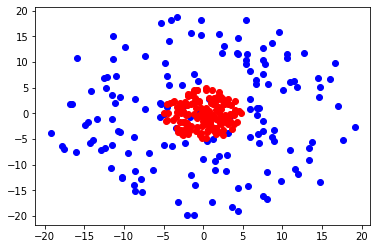

In [21]:
datos_1 = circulo(num_datos = 150, R = 2)
datos_2 = circulo(num_datos = 150, R = 0.5)
X = np.concatenate([datos_1,datos_2])
X = np.round(X,3)

Y = [0] * 150 + [1] * 150
Y = np.array(Y).reshape(len(Y),1)
plt.cla()
plt.scatter(X[0:150,0],X[0:150,1], c = "b")
plt.scatter(X[150:300,0],X[150:300,1], c = "r")
plt.show()

In [22]:
def entrenamiento(X,Y, red_neuronal, lr = 0.01):

  output = [X]

  for num_capa in range(len(red_neuronal)):
    z = output[-1] @ red_neuronal[num_capa].W + red_neuronal[num_capa].b

    a = red_neuronal[num_capa].funcion_act[0](z)

    output.append(a)

  # Backpropagation

  back = list(range(len(output)-1))
  back.reverse()


  delta = []

  for capa in back:
    # Backprop #delta

    a = output[capa+1]

    if capa == back[0]:
      x = mse(a,Y)[1] * red_neuronal[capa].funcion_act[1](a)
      delta.append(x)

    else:
      x = delta[-1] @ W_temp * red_neuronal[capa].funcion_act[1](a)
      delta.append(x)

    W_temp = red_neuronal[capa].W.transpose()

    # Gradient Descent #
    red_neuronal[capa].b = red_neuronal[capa].b - np.mean(delta[-1], axis = 0, keepdims = True) * lr
    red_neuronal[capa].W = red_neuronal[capa].W - output[capa].transpose() @ delta[-1] * lr

  return output[-1]

In [23]:
class capa():
  def __init__(self, n_neuronas_capa_anterior, n_neuronas, funcion_act):
    self.funcion_act = funcion_act
    self.b  = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size= n_neuronas).reshape(1,n_neuronas),3)
    self.W  = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size= n_neuronas * n_neuronas_capa_anterior).reshape(n_neuronas_capa_anterior,n_neuronas),3)

neuronas = [2,4,8,1] 
funciones_activacion = [relu,relu, sigmoid]
red_neuronal = []

for paso in list(range(len(neuronas)-1)):
  x = capa(neuronas[paso],neuronas[paso+1],funciones_activacion[paso])
  red_neuronal.append(x)    

In [24]:
error = []
predicciones = []

for epoch in range(0,1000):
  ronda = entrenamiento(X = X ,Y = Y ,red_neuronal = red_neuronal, lr = 0.001)
  predicciones.append(ronda)
  temp = mse(np.round(predicciones[-1]),Y)[0]
  error.append(temp)

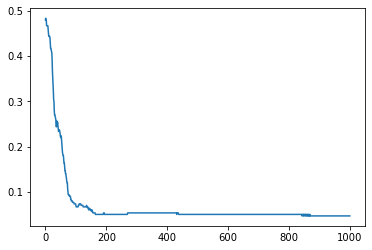

In [25]:
epoch = list(range(0,1000))
plt.plot(epoch, error)